In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_clean = pd.read_csv('./train_clean.csv')

In [ ]:
#some removal
train=train_clean.drop('Unnamed: 0',axis=1).drop('question_text',axis=1)
train.head()

,qid,target,clean_text
0,00002165364db923c7e6,0,quebec nationalist see province nation
1,000032939017120e6e44,0,adopted dog would encourage people adopt shop
2,0000412ca6e4628ce2cf,0,velocity affect time velocity affect space geo...
3,000042bf85aa498cd78e,0,otto von guericke used magdeburg hemisphere
4,0000455dfa3e01eae3af,0,convert montra helicon mountain bike changing ...


In [ ]:
train_sample=train.sample(frac=0.01,random_state=42)

In [ ]:
X=train_sample.drop('qid',axis=1).drop('target',axis=1)
y=train_sample.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=0)

In [ ]:
X_train.shape

(10448, 1)

In [ ]:
X_test.shape

(2613, 1)

In [ ]:
y_train.shape

(10448,)

In [ ]:
y_train.head()

774434     0
373019     0
996260     0
23727      0
1111433    0
Name: target, dtype: int64

In [ ]:
y_test.shape

(2613,)

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
(y_train == 0).sum()

9764

In [ ]:
(y_train == 1).sum()

684

In [ ]:
(y_test == 0).sum()

2455

In [ ]:
(y_test == 1).sum()

158

In [ ]:
X_train['clean_text'].fillna('', inplace=True)
X_test['clean_text'].fillna('', inplace=True)

In [ ]:
vectorizer=TfidfVectorizer(analyzer='word',stop_words='english')
X_train_tfidf=vectorizer.fit_transform(X_train['clean_text'])
X_test_tfidf = vectorizer.transform(X_test['clean_text'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
trainingScore=lr.score(X_train_tfidf,y_train)
trainingScore

0.9394142419601837

In [ ]:
validationScore=lr.score(X_test_tfidf,y_test)
validationScore

0.9433601224646001

In [ ]:

B = np.arange(10,200,10)
grid = {    'C': [0.01,0.1, 1, 10,100,1000],  
    'penalty': ['l2']  
       }

lr = LogisticRegression(max_iter=1000)
lrCV = GridSearchCV(lr,param_grid=grid,return_train_score=True,n_jobs=-1)
lrCV.fit(X_train_tfidf,y_train)

print()
print('         best B =',lrCV.best_params_)
print('  validation R2 =',lrCV.best_score_.round(3))




         best B = {'C': 10, 'penalty': 'l2'}
  validation R2 = 0.937


In [ ]:
lrCV.score(X_test_tfidf,y_test)

0.9433601224646001

In [ ]:
lr = LogisticRegression(penalty='l2',C=10,max_iter=1000)
lr.fit(X_train_tfidf,y_train)

LogisticRegression(C=10, max_iter=1000)

In [ ]:
lr.score(X_test_tfidf,y_test)

0.9433601224646001

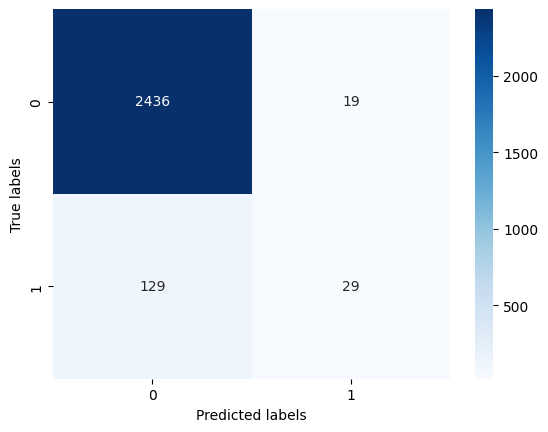

In [ ]:
predictions=lrCV.predict(X_test_tfidf)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
cm

array([[2436,   19],
       [ 129,   29]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2455
           1       0.60      0.18      0.28       158

    accuracy                           0.94      2613
   macro avg       0.78      0.59      0.63      2613
weighted avg       0.93      0.94      0.93      2613



<Axes: xlabel='Regularization strength'>

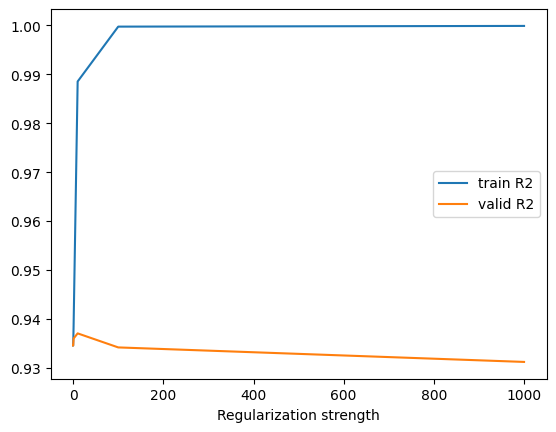

In [ ]:
results = pd.DataFrame()
results['Regularization strength'] = grid['C']
results['train R2'] = lrCV.cv_results_['mean_train_score']
results['valid R2']  = lrCV.cv_results_['mean_test_score']
results.plot.line(x='Regularization strength',y=['train R2','valid R2'])

In [ ]:
X_train_tfidf

<10448x13279 sparse matrix of type '<class 'numpy.float64'>'
	with 58708 stored elements in Compressed Sparse Row format>